<img src="../static/logopython.png" alt="Logo Python" style="width: 300px; display: inline"/>
<img src="../static/deimoslogo.png" alt="Logo Deimos" style="width: 300px; display: inline"/>

# Clase 10: Visualización con matplotlib

_Después de estudiar la sintaxis de Python y empezar a manejar datos numéricos de manera un poco más profesional, ha llegado el momento de visualizarlos. Con la biblioteca **matplotlib** podemos crear gráficos de muy alta calidad y altamente personalizables._

_matplotlib es una biblioteca muy potente que requiere tiempo de práctica para dominarla. Vamos a empezar por lo más sencillo._

## ¿Qué es matplotlib?

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es activar el modo *inline* - de esta manera las figuras aparecerán automáticamente incrustadas en el notebook.

In [5]:
%matplotlib inline

Importamos los paquetes necesarios:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería (http://matplotlib.org/gallery.html#pylab_examples):

In [7]:
from IPython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado (ejemplo: http://matplotlib.org/examples/pylab_examples/annotation_demo.html):

In [8]:
HTML('<iframe src="http://matplotlib.org/examples/pylab_examples/annotation_demo.html" width="800" height="600"></iframe>')

## Interfaz pyplot

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

### Función `plot`

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función [`plot`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot):

In [8]:
plt

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

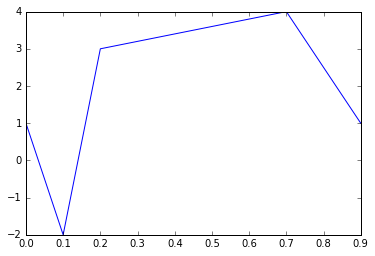

In [9]:
plt.plot([0.0, 0.1, 0.2, 0.7, 0.9], [1, -2, 3, 4, 1])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio. Por ejemplo:

$$ f(x) = e^{-x^2} $$

In [11]:
def f(x):
    return np.exp(-x ** 2)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [12]:
x = np.linspace(-1, 3, 100)

Y representamos la función:

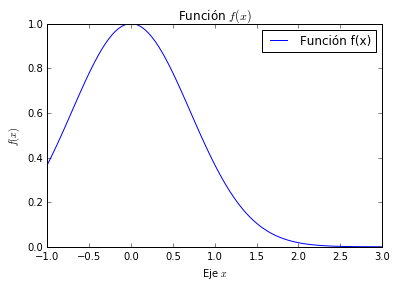

In [13]:
plt.plot(x, f(x), label="Función f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Función $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

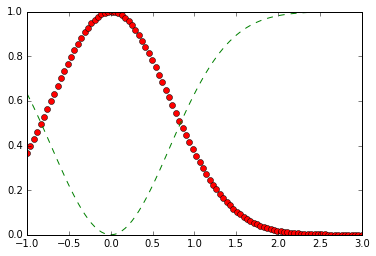

In [14]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g--')

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

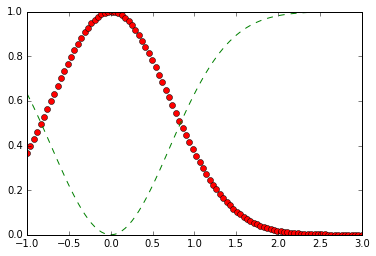

In [15]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x, 1 - f(x), c='g', ls='--')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Más personalización, pero a lo loco

Desde matplotlib 1.4 se puede manipular fácilmente la apariencia de la gráfica usando **estilos**. Para ver qué estilos hay disponibles, escribiríamos `plt.style.available`.

In [16]:
plt.style.available

['seaborn-whitegrid',
 'seaborn-notebook',
 'fivethirtyeight',
 'classic',
 'seaborn-muted',
 'seaborn-ticks',
 'bmh',
 'dark_background',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'grayscale',
 'seaborn-poster',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-dark',
 'ggplot']

No hay muchos pero podemos crear los nuestros. Para activar uno de ellos, usamos `plt.style.use`. ¡Aquí va el que uso yo! https://gist.github.com/Juanlu001/edb2bf7b583e7d56468a

In [13]:
#plt.style.use("ggplot")  # Afecta a todos los plots

<div class="alert alert-warning">No he sido capaz de encontrar una manera fácil de volver a la apariencia por defecto en el notebook. A ver qué dicen los desarrolladores (https://github.com/ipython/ipython/issues/6707) ¡pero de momento si quieres volver a como estaba antes toca reiniciar el notebook!</div>

Para emplear un estilo solo a una porción del código, creamos un bloque `with plt.style.context("STYLE")`:

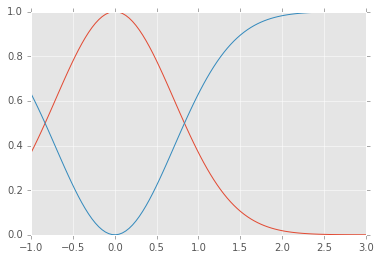

In [17]:
with plt.style.context('ggplot'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

Y hay otro tipo de personalización más loca todavía:

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS', 'StayPuft'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


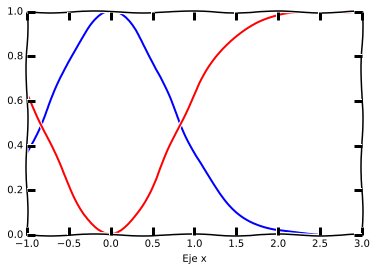

In [18]:
with plt.xkcd():
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))
    plt.xlabel("Eje x")

¡Nunca imitar a XKCD fue tan fácil! http://xkcd.com/353/

### Otros tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

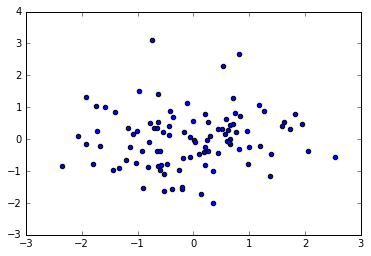

In [19]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

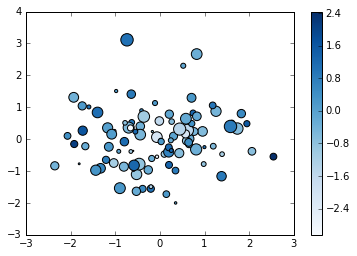

In [20]:
s = np.abs(50 + 50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

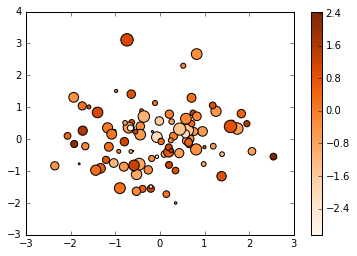

In [22]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos (http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#colormaps)

![matplotlib colormaps](../static/plot_colormaps.png)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = x^2 - y^2$$

In [23]:
def f(x, y):
    return x ** 2 - y ** 2

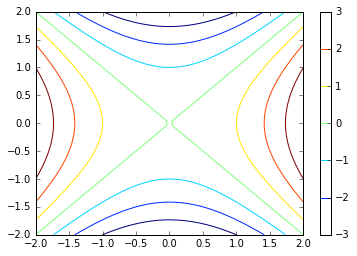

In [24]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.contour(xx, yy, zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

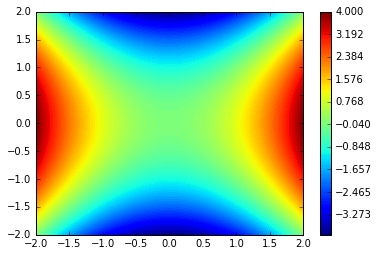

In [25]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 100))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

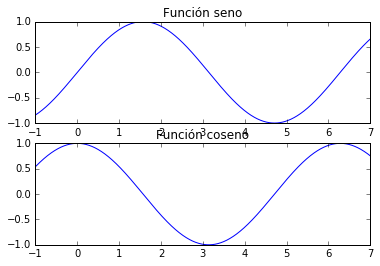

In [29]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()
plt.subplot(211)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno")

<div class="alert alert-info">¿Cómo se ajusta el espacio entre gráficas para que no se solapen los textos? Buscamos en Google "plt.subplot adjust" en el primer resultado tenemos la respuesta http://stackoverflow.com/a/9827848</div>

Como hemos guardado la figura en una variable, puedo recuperarla más adelate y seguir editándola.

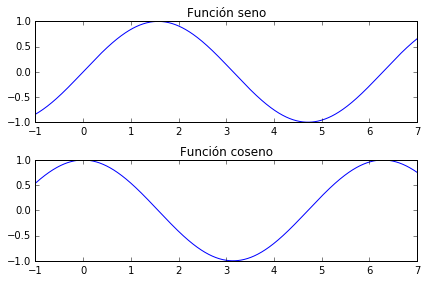

In [30]:
fig.tight_layout()
fig

<div class="alert alert-warning">Si queremos manipular la figura una vez hemos abandonado la celda donde la hemos definido, tendríamos que utilizar la interfaz orientada a objetos de matplotlib. Es un poco lioso porque algunas funciones cambian de nombre, así que en este curso no la vamos a ver. Si te interesa puedes ver los notebooks de la primera edición, donde sí la introdujimos.

https://github.com/AeroPython/Curso_AeroPython/releases/tag/v1.0</div>

### El truco final: componentes interactivos

No tenemos mucho tiempo pero vamos a ver algo interesante que se ha introducido hace poco en el notebook: **componentes interactivos**.

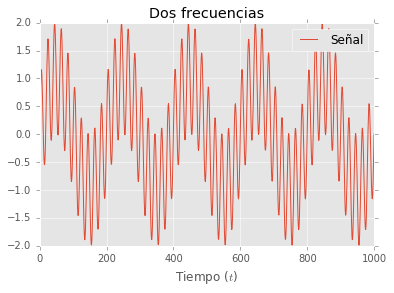

In [10]:
from IPython.html.widgets import interactive

interactive(frecuencias, f1=(10.0,200.0), f2=(10.0,200.0))

## Referencias

* Guía de matplotlib para principiantes http://matplotlib.org/users/beginner.html
* Tutorial de matplotlib en español http://pybonacci.org/tag/tutorial-matplotlib-pyplot/
* Referencia rápida de matplotlib http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#quick-references

---

Clase en vídeo, parte del [Curso de Python para científicos e ingenieros](http://cacheme.org/curso-online-python-cientifico-ingenieros/) grabado en la Escuela Politécnica Superior de la Universidad de Alicante.

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("h-rXAfqddHE", width=560, height=315, list="PLGBbVX_WvN7bMwYe7wWV5TZt1a58jTggB")

---

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso-AeroPython-UC3M/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

##### <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/juanluiscanor" data-format="inline" data-related="false"></script> <script src="//platform.linkedin.com/in.js" type="text/javascript"></script> <script type="IN/MemberProfile" data-id="http://es.linkedin.com/in/alejandrosaezm" data-format="inline" data-related="false"></script>

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [1]:
%%html
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [2]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())